This guided project aims to answer the following questions by applying data cleaning techniques:
<ul>
<li> Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
<li> Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
</ul>

In [1060]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

for survey in (dete_survey,tafe_survey):
    print(survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Both surveys contain multiple columns that represents the same topic.

In [1061]:
for survey in (dete_survey,tafe_survey):
    print(survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [1062]:
# Checking how many null values are present in each data set
for survey in (dete_survey, tafe_survey):
    print(survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Tafe_survey has complicated column headings, which presumably would lead to a higher proportion of null values as shown above.

In [1063]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [1064]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Columns that are unrelated to this analysis have been removed to simplify the data set and allow easier visualisation.

In [1065]:
# Standardising the column names to make the data look neater
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace('/','_').str.replace(' ','_')
print(dete_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [1066]:
# Similarly, renaming the columns to make dataset easier for interpretation
map = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns = map)
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

The separationtype column in both datasets contains many variety of entries and we would ideally want entries that are similar in nature to be grouped together.

In [1067]:
for survey in (dete_survey_updated, tafe_survey_updated):
    print(survey['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [1068]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [1069]:
# Renaming the column separationtype to Resignation
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

In [1070]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

In [1071]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null object
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_enviro

dete_resignations does not have an 'institute_service' columns, hence we will be creating that manually.

In [1072]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [1073]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})')
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
dete_resignations['cease_date'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [1074]:
for date in ['cease_date','dete_start_date']:
    print(dete_resignations[date].value_counts().sort_index(ascending=True))

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [1075]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [1076]:
# Removing entries that are outliers
dete_resignations = dete_resignations[dete_resignations['dete_start_date']>1999]
dete_resignations['dete_start_date'].value_counts().sort_index()

2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [1077]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].value_counts())
print(tafe_resignations['institute_service'].value_counts())

5.0     23
1.0     22
0.0     20
3.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
8.0      8
13.0     6
12.0     6
10.0     6
11.0     3
Name: institute_service, dtype: int64
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


We can see that the institute_service column in tafe_resignation has a different format to that column in dete_resignation. We will later on be merging the two datasets together according to the institute_service column so we will change the format in tafe_resignation to match that of the dete_resignation.
For the entries that are in the form of a range, we shall take the value on the lower side to consider the worst case scenario and 'Less than 1 year' to replace as 1 year, 'More than 20 years' replaced as 20 years. 

In [1078]:
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.split('-').str[0]

tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1                     64
3                     63
5                     33
11                    26
7                     21
More than 20 years    10
Name: institute_service, dtype: int64

In [1079]:
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.replace(r'[a-z]?[A-Z]?','').str.strip()
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].astype('float')
print(tafe_resignations['institute_service'].value_counts())

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service, dtype: int64


We will now consider the factors columns in tafe_resignations and group the dissatisfaction entries together.

In [1080]:
for factors in ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']:
    print(tafe_resignations[factors].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We would replace any NaN or entries that only has a '-' with False.

In [1081]:
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True

factors = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[factors].applymap(update_vals).any(axis=1,skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [1082]:
factors2 = ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']
dete_resignations['dissatisfied'] = dete_resignations[factors2].any(axis=1,skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    104
True      90
Name: dissatisfied, dtype: int64

Now both datasets has a common columnn that shows the number of employees that left because of various dissatisfaction of the job.
The datasets can now be grouped together.

In [1083]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [1084]:
# Concatenate the datasets together horizontally
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [1085]:
combined.isnull().sum()

Contributing Factors. Career Move - Private Sector     202
Contributing Factors. Career Move - Public Sector      202
Contributing Factors. Career Move - Self-employment    202
Contributing Factors. Dissatisfaction                  202
Contributing Factors. Ill Health                       202
Contributing Factors. Interpersonal Conflict           202
Contributing Factors. Job Dissatisfaction              202
Contributing Factors. Maternity/Family                 202
Contributing Factors. NONE                             202
Contributing Factors. Other                            202
Contributing Factors. Study                            202
Contributing Factors. Travel                           202
Institute                                              194
WorkArea                                               194
aboriginal                                             529
age                                                     51
business_unit                                          5

In [1086]:
# Dropping columns that have less than 300 null values to simplyfy dataset
combined_updated = combined.dropna(axis = 1,thresh = 300).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 24 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [1087]:
# Checking the number of empty entries in the institute_service column
combined_updated['institute_service'].isnull().sum()

56

To make the year of service easier to interpret, we can categorise them into 4 categories:
<ul>
<li> New for less than 3 years
<li> Experience for between 3 to 6 years
<li> Established for between 7 and 10 years
<li> Veteran for more than 11 years
<ul>

In [1088]:
def categorise(year):
    if year < 3:
        return 'New'
    elif year > 3 and year <= 6:
        return 'Experienced'
    elif year > 7 and year <= 10:
        return 'Established'
    elif year > 11:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorise)
combined_updated['service_cat'].value_counts()

New            193
Experienced     89
Established     28
Veteran         22
Name: service_cat, dtype: int64

In [1089]:
# To fill in any NaN values with False, to consider the worst case scenario
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    353
True     181
Name: dissatisfied, dtype: int64

In [1090]:
# Create pivot table for a summarised table of the two columns
pivot = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
pivot

,dissatisfied
service_cat,
Established,0.607143
Experienced,0.404494
New,0.295337
Veteran,0.454545


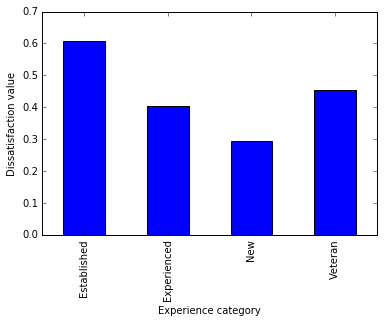

In [1097]:
# Plotting bar chart for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
pivot.plot(kind = 'bar',legend=False)
plt.ylabel('Dissatisfaction value')
plt.xlabel('Experience category')

For the preliminary analysis, we can conclude that employees with a higher number of years of service are more likely to resign due to dissatisfaction of some sort. Whereas employees with more than 11 years of service are more satisfied compared to those with 7-10 years of experience.